<a href="https://colab.research.google.com/github/MuhammadShavaiz/pytorch-google-colab/blob/main/customdatasets_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [11]:
import os
def walkthrough_dir(path_name):
  for dirpath, dirnames, filenames in os.walk(path_name):
    print(f'there are {len(dirnames)} directories, and there are {len(filenames)} files')

In [12]:
walkthrough_dir(image_path)

there are 2 directories, and there are 0 files
there are 3 directories, and there are 0 files
there are 0 directories, and there are 19 files
there are 0 directories, and there are 31 files
there are 0 directories, and there are 25 files
there are 3 directories, and there are 0 files
there are 0 directories, and there are 75 files
there are 0 directories, and there are 72 files
there are 0 directories, and there are 78 files


In [13]:
train_path = image_path/'train'
test_path = image_path/'test'

image class: pizza
image height: 512
image width: 512


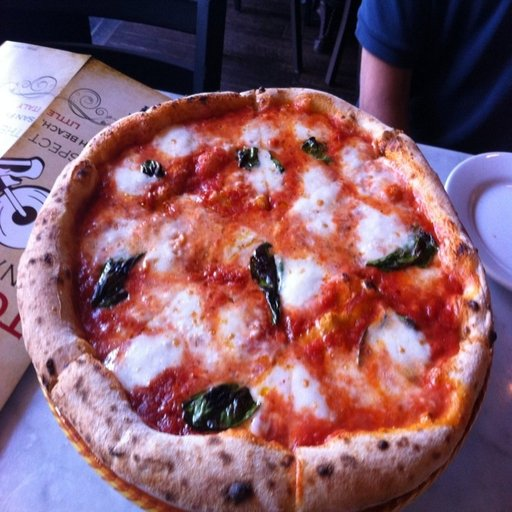

In [14]:
from PIL import Image
import random
image_path_list = list(image_path.glob('*/*/*.jpg'))
random_image = random.choice(image_path_list)
random_image_class = random_image.parent.stem
image = Image.open(random_image)
print(f'image class: {random_image_class}')
print(f'image height: {image.height}')
print(f'image width: {image.width}')
image

Text(0.5, 1.0, 'class_name: pizza')

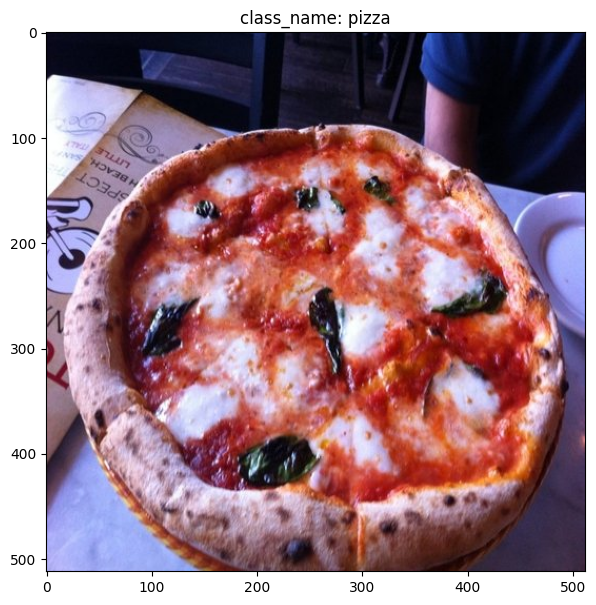

In [15]:
image_array = np.asarray(image)
plt.figure(figsize=(10,7))
plt.imshow(image_array)
plt.title(f'class_name: {random_image_class}')

In [16]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [17]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

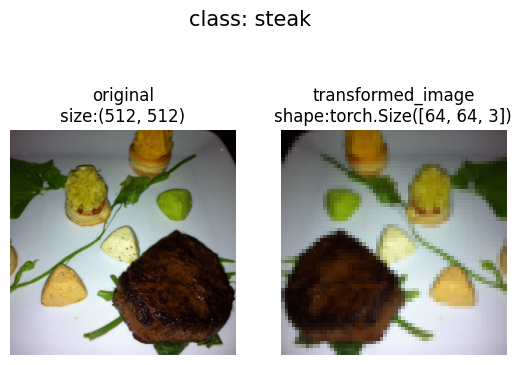

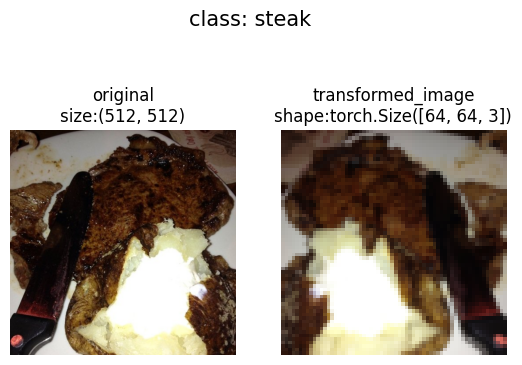

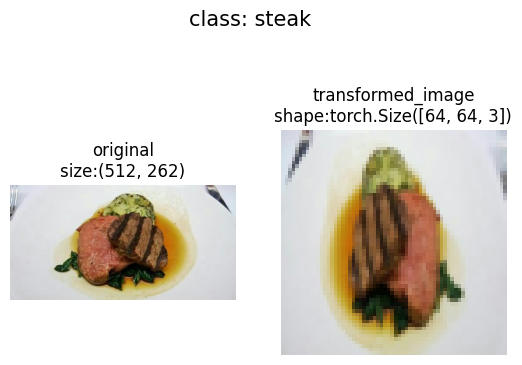

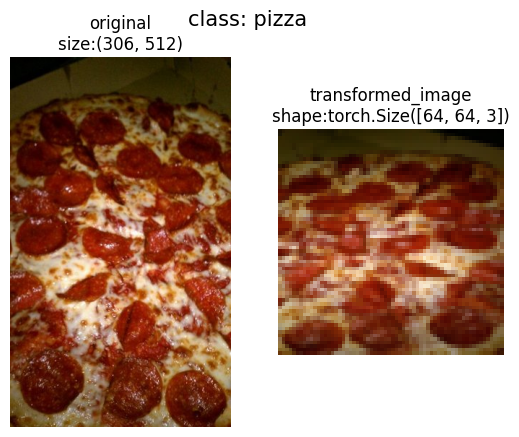

In [18]:
def plot_trans_img(image_path: list, transform, n=4, seed=None):
  random_image_paths = random.sample(image_path, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig ,ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f'original\nsize:{f.size}')
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'transformed_image\nshape:{transformed_image.shape}')
      ax[1].axis(False)

      fig.suptitle(f'class: {image_path.parent.stem}', fontsize = 15)

plot_trans_img(image_path_list, data_transform)



In [19]:
train_data = datasets.ImageFolder(root = train_path, transform = data_transform,
                                  target_transform = None)
test_data = datasets.ImageFolder(root = test_path, transform = data_transform,
                                 target_transform = None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [20]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [21]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [22]:
img , label = train_data[0][0], train_data[0][1]
print(f'image_tensor:{img}')
print(f'image_shape:{img.shape}')
print(f'image_dtype:{img.dtype}')
print(f'label:{label}')
print(f'label_type:{type(label)}')

image_tensor:tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.015

original_shape:torch.Size([3, 64, 64])
permuted_shape:torch.Size([64, 64, 3])


(-0.5, 63.5, 63.5, -0.5)

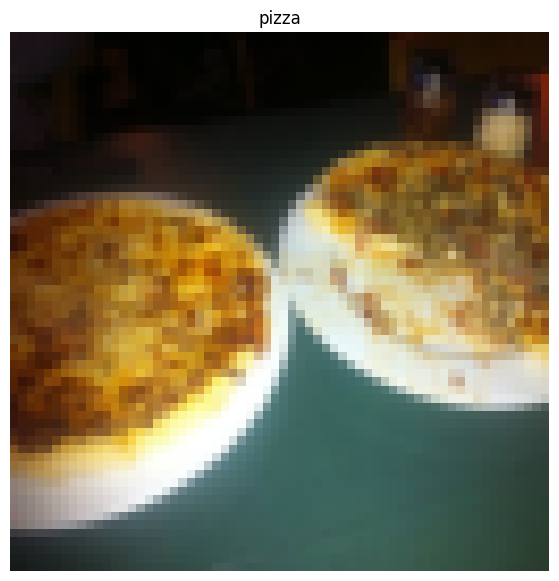

In [23]:
img_permute = img.permute(1,2,0)
print(f'original_shape:{img.shape}')
print(f'permuted_shape:{img_permute.shape}')
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f'{class_names[label]}')
plt.axis(False)

In [24]:
BATCH_SIZE = 16
train_dataloader = DataLoader(dataset = train_data, batch_size=BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(dataset = test_data, batch_size=BATCH_SIZE, shuffle = True)

In [25]:
len(train_dataloader), len(test_dataloader)

(15, 5)

In [26]:
batch, label = next(iter(train_dataloader))
print(f'image_shape:{img.shape}')
print(f'label_shape:{label.shape}')

image_shape:torch.Size([3, 64, 64])
label_shape:torch.Size([16])


In [27]:
import os
import pathlib
from PIL import Image
from typing import List, Dict, Tuple
from torch.utils.data import Dataset
from torchvision import transforms

In [31]:
def find_classes(directory:str) -> Tuple[List[str], Dict[str,int]]:
  classes = sorted (entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f'could not find any file in {directory} directory')
  class_to_idx = {class_names:i for i, class_names in enumerate(classes)}
  return classes, class_to_idx

In [32]:
find_classes(train_path)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [70]:
class ImageFolderCustom(Dataset):
  def __init__(self, target_dir, transform = None):
    self.paths = list(pathlib.Path(target_dir).glob('*/*.jpg'))
    self.transform = transform
    self.classes , self.class_to_idx = find_classes(target_dir)
  def load_image(self, index:int):
    image_path = self.paths[index]
    return Image.open(image_path)
  def __len__(self):
    return len(self.paths)
  def __getitem__(self,index:int):
    image = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(image),class_idx
    else:
      return image ,class_idx




In [71]:
transform_train_custom = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
transform_test_custom = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
    ])

In [72]:
train_data_custom = ImageFolderCustom(train_path, transform_train_custom)
test_data_custom = ImageFolderCustom(test_path, transform_test_custom)

In [73]:
train_data_custom[1]

(tensor([[[0.0157, 0.0353, 0.2275,  ..., 0.5569, 0.4784, 0.3216],
          [0.0157, 0.0157, 0.0667,  ..., 0.5490, 0.5451, 0.5294],
          [0.0157, 0.0118, 0.0118,  ..., 0.5176, 0.5373, 0.5333],
          ...,
          [0.8941, 0.8941, 0.9020,  ..., 0.3098, 0.3373, 0.3765],
          [0.8902, 0.8941, 0.9020,  ..., 0.4039, 0.4235, 0.4588],
          [0.9216, 0.9020, 0.9020,  ..., 0.4745, 0.4902, 0.4902]],
 
         [[0.0157, 0.0196, 0.1098,  ..., 0.4706, 0.4039, 0.2667],
          [0.0118, 0.0157, 0.0353,  ..., 0.4706, 0.4745, 0.4549],
          [0.0118, 0.0157, 0.0118,  ..., 0.4471, 0.4627, 0.4667],
          ...,
          [0.8314, 0.8314, 0.8392,  ..., 0.1255, 0.1490, 0.1765],
          [0.8275, 0.8314, 0.8353,  ..., 0.1922, 0.2118, 0.2510],
          [0.8588, 0.8353, 0.8275,  ..., 0.2667, 0.2863, 0.3020]],
 
         [[0.0196, 0.0275, 0.1059,  ..., 0.4157, 0.3529, 0.2431],
          [0.0275, 0.0275, 0.0353,  ..., 0.4118, 0.4196, 0.4000],
          [0.0275, 0.0235, 0.0314,  ...,

In [74]:
len(train_data_custom), len(train_data)

(225, 225)

In [75]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [78]:
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    if seed:
        random.seed(seed)

    random_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(20, 10))

    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        targ_image_adjust = targ_image.permute(1, 2, 0)

        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)


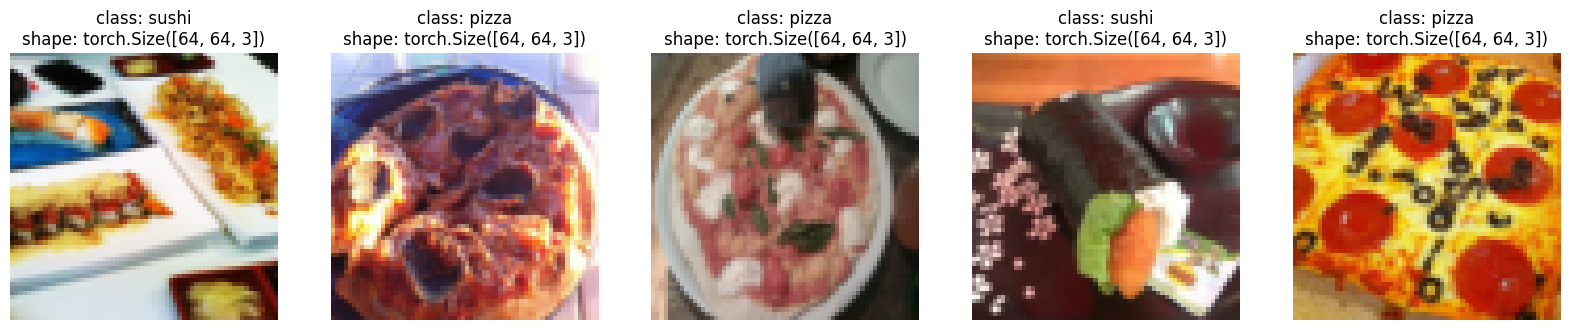

In [79]:
display_random_images(train_data, class_names, 5,  seed = 42)

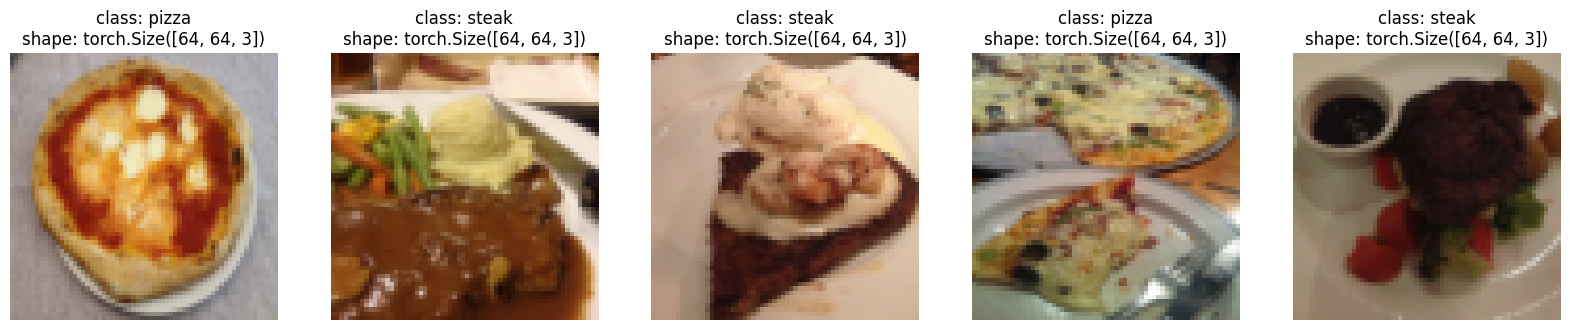

In [82]:
display_random_images(train_data_custom, train_data_custom.classes, 5, seed =42 )

In [84]:
custom_train_loader = DataLoader(dataset = train_data_custom, batch_size = 16, shuffle = True)
custom_test_loader = DataLoader (dataset = test_data_custom, batch_size = 16, shuffle = True)
custom_train_loader, custom_test_loader

(<torch.utils.data.dataloader.DataLoader at 0x79d611ce7ac0>,
 <torch.utils.data.dataloader.DataLoader at 0x79d611ce74f0>)